In [85]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
import pandas as pd
from  sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
import seaborn as sns

%matplotlib inline

In [ ]:
# Q1

In [93]:
df_camera = pd.read_csv('Camera.csv', sep=";", na_values=[0])
df_camera = df_camera.drop(columns=['Model'])
df_camera

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1997,1024.0,640.0,NaN,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,NaN,4.0,420.0,158.0,179.0
2,2000,640.0,NaN,NaN,45.0,45.0,NaN,NaN,2.0,NaN,NaN,179.0
3,1999,1152.0,640.0,NaN,35.0,35.0,NaN,NaN,4.0,NaN,NaN,269.0
4,1999,1152.0,640.0,NaN,43.0,43.0,50.0,NaN,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [97]:
df_camera.iloc[:,:-1] = SimpleImputer(missing_values = np.NaN, strategy = 'median').fit_transform(df_camera.iloc[:,:-1])
df_camera

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1997.0,1024.0,640.0,5.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998.0,1280.0,640.0,1.0,38.0,114.0,50.0,7.0,4.0,420.0,158.0,179.0
2,2000.0,640.0,2048.0,5.0,45.0,45.0,50.0,7.0,2.0,230.0,102.0,179.0
3,1999.0,1152.0,640.0,5.0,35.0,35.0,50.0,7.0,4.0,230.0,102.0,269.0
4,1999.0,1152.0,640.0,5.0,43.0,43.0,50.0,7.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2001.0,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,2000.0,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,2001.0,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,2001.0,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


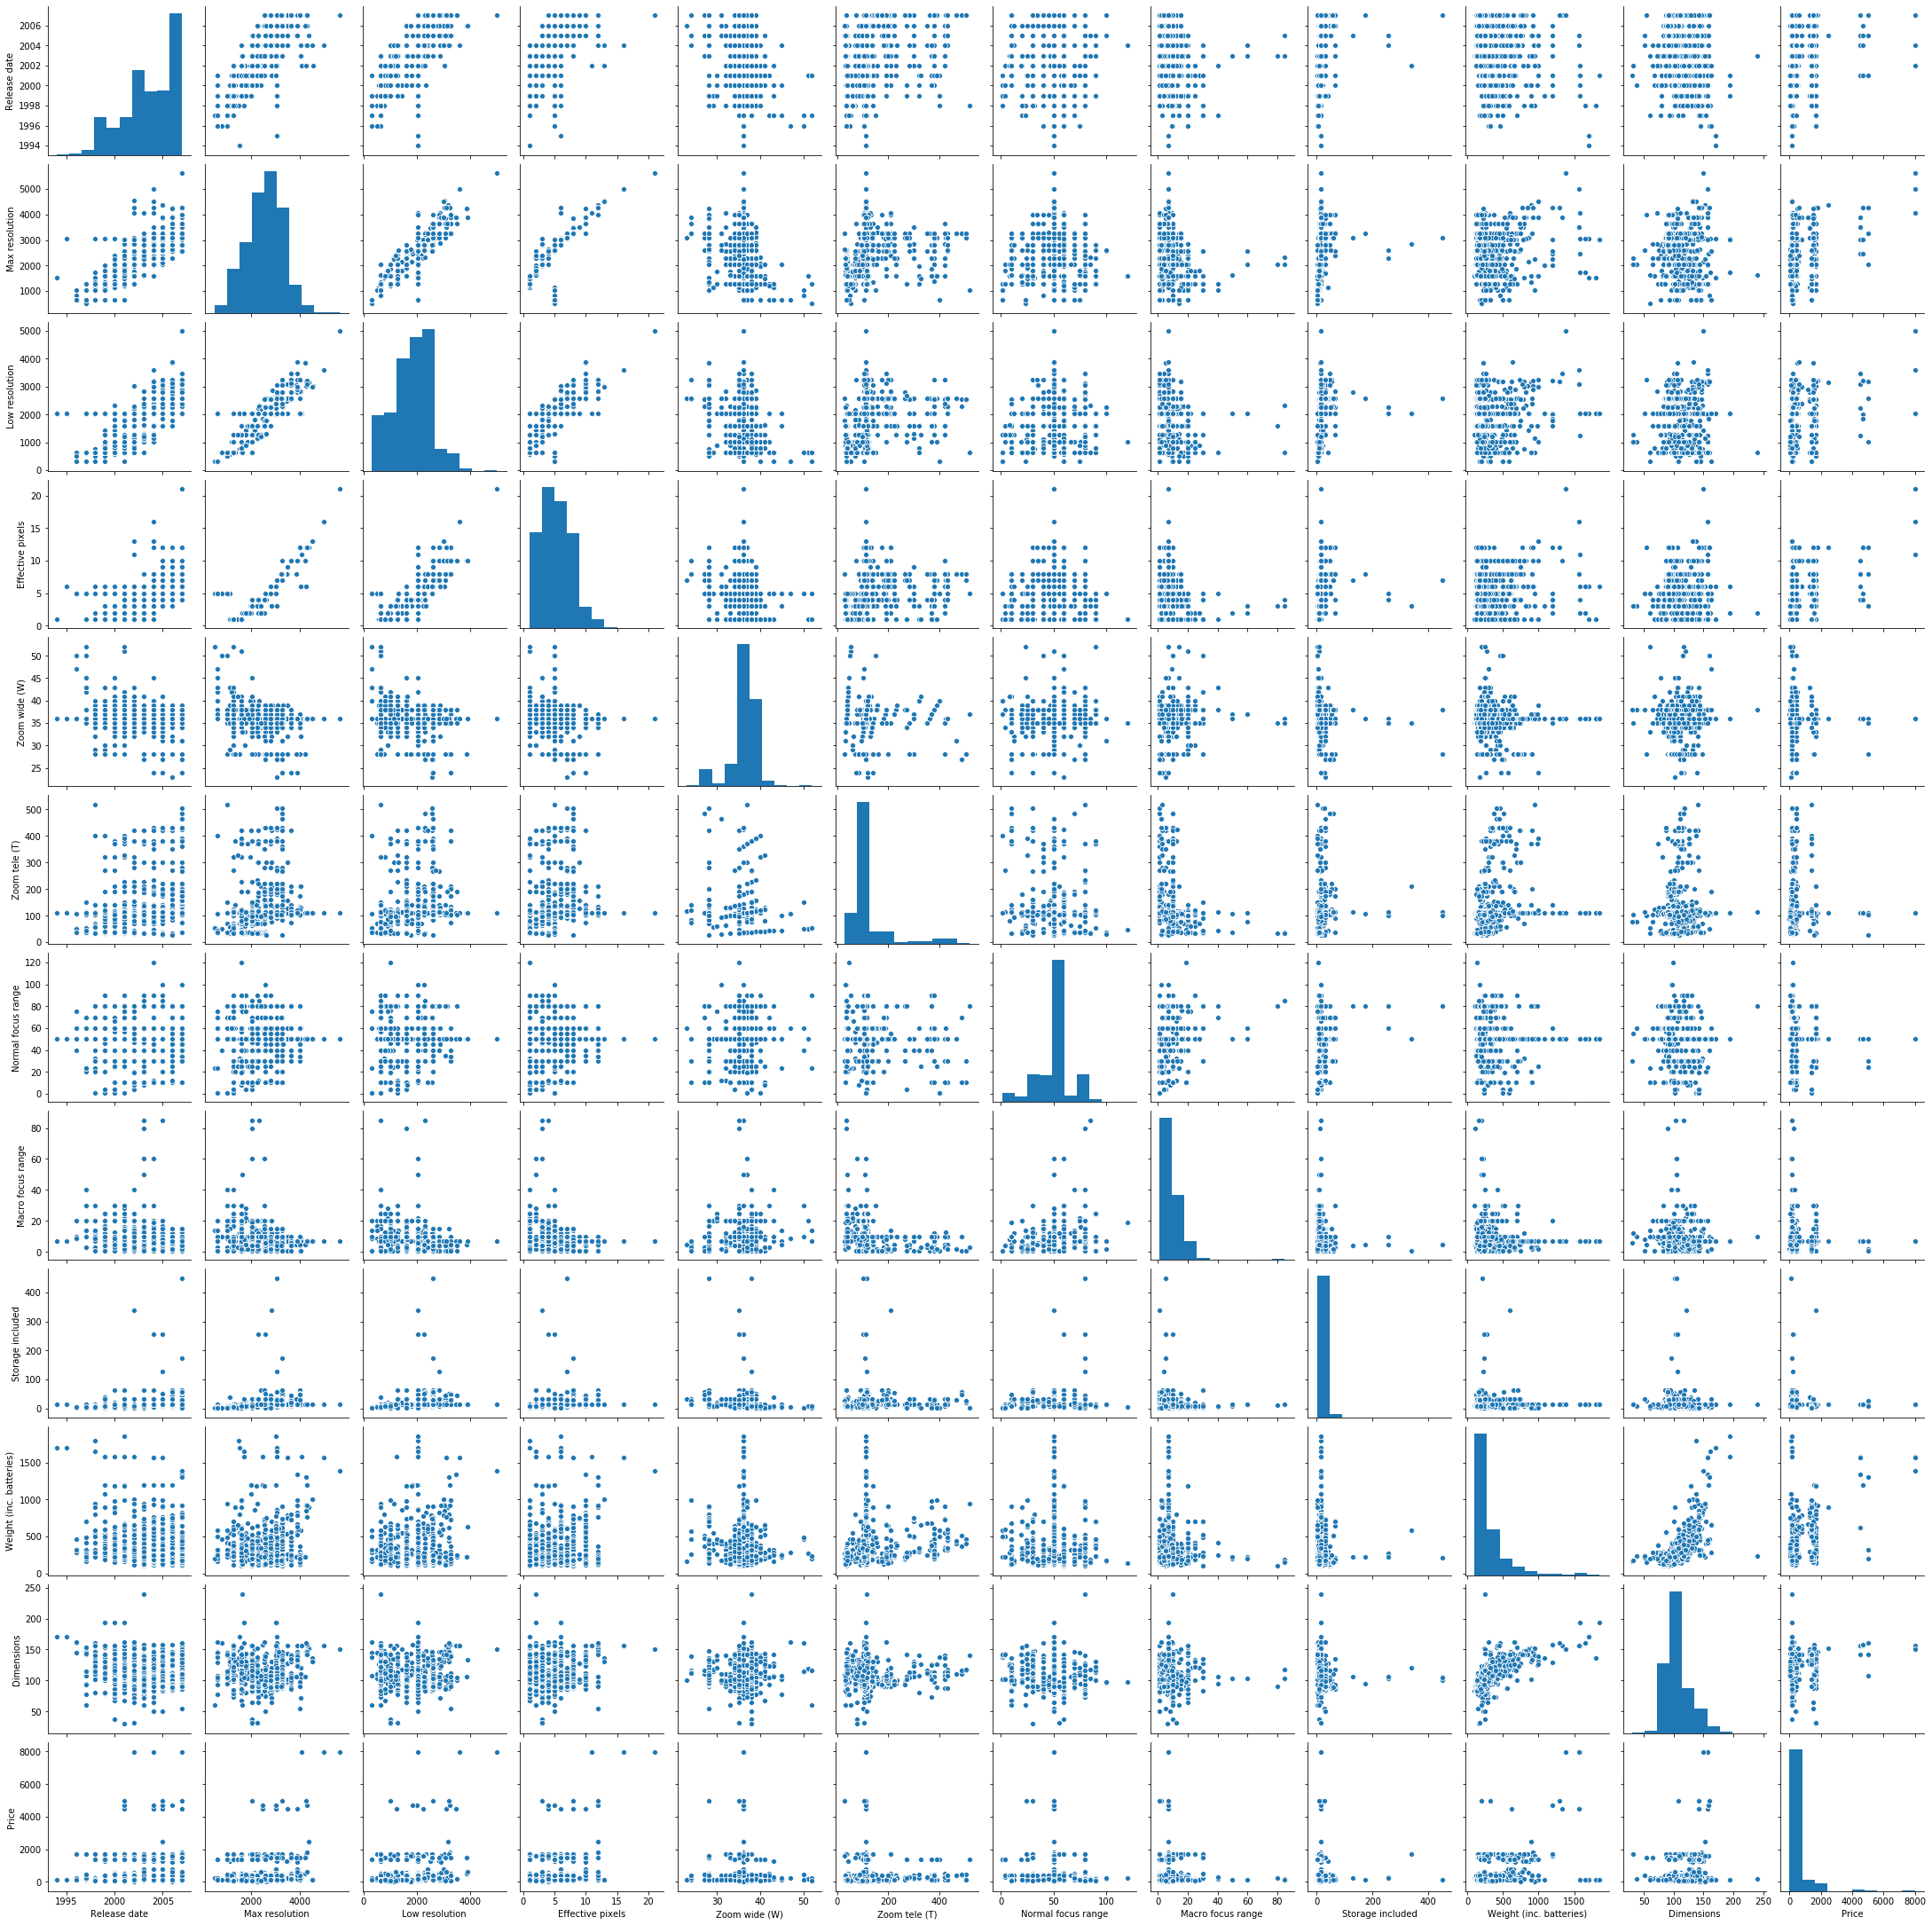

In [98]:
sns.pairplot(df_camera)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df_camera.iloc[:,:-1], df_camera.iloc[:,-1:], test_size = 0.2, random_state=0)

lin_model = LinearRegression().fit(X_train, y_train)

In [101]:
lin_model.coef_

array([[40.40381123,  0.07460773, -0.23966793, 50.97927225,  4.9745386 ,
        -1.48000412, -1.90502145, -0.09214424, -0.45640947,  1.55187348,
        -0.40041508]])

In [102]:
lin_model.intercept_

array([-80819.46828035])

In [ ]:
# Q2

In [14]:
boston_data = datasets.load_boston()

In [3]:
boston_data_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston_data_df['Price'] = boston_data.target
boston_data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
col = boston_data_df.columns
min_max_scaler = preprocessing.MinMaxScaler()
boston_data_df = min_max_scaler.fit_transform(boston_data_df)
boston_data_df = pd.DataFrame(boston_data_df)
boston_data_df.columns=col
boston_data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [6]:
x_train, x_test, y_train, y_test = train_test_split(boston_data_df.iloc[:,:-1], boston_data_df.iloc[:,-1:],test_size = 0.3, random_state=42)

In [7]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_predict = lin_model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.07028244158794243
Mean Squared Error: 0.010625898385766549
Root Mean Squared Error: 0.10308199835939615


In [18]:
cvs = cross_val_score(lin_model, x_train, y_train, cv=5)
print("5-Fold Cross Validation : \n",cvs)

5-Fold Cross Validation : 
 [0.74541483 0.52216586 0.75607169 0.76738846 0.64887182]


In [19]:
avg = 0
for c in cvs:
    avg += c
avg /= 5
print("average of 5-Fold Cross Validation : \n",avg)

average of 5-Fold Cross Validation : 
 0.6879825316957147


In [12]:
print(lin_model.intercept_)
print(lin_model.coef_)

[0.43924842]
[[-0.26388487  0.07957536  0.03002173  0.06932967 -0.16650426  0.47054495
  -0.02334896 -0.33870409  0.12406064 -0.10133268 -0.19023202  0.10394023
  -0.44060859]]


In [ ]:
# Q3

In [23]:
cancer = load_breast_cancer()

In [25]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'], ['cancer']))
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_cancer.iloc[:,:-1], df_cancer.iloc[:,-1:], test_size = 0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

C:\Users\Zigorat\Anaconda3\envs\env_cxr\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


acc for training data: 0.998
acc for test data: 0.956


In [43]:
from sklearn.preprocessing import StandardScaler

x = df_cancer.iloc[:,:-1].values

y = df_cancer.iloc[:,-1:].values

x = StandardScaler().fit_transform(x)

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

In [45]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [47]:
finalDf = pd.concat([principalDf, df_cancer[['cancer']]], axis = 1)

In [50]:
finalDf

,pc1,pc2,cancer
0,9.192837,1.948583,0.0
1,2.387802,-3.768172,0.0
2,5.733896,-1.075174,0.0
3,7.122953,10.275589,0.0
4,3.935302,-1.948072,0.0
...,...,...,...
564,6.439315,-3.576817,0.0
565,3.793382,-3.584048,0.0
566,1.256179,-1.902297,0.0
567,10.374794,1.672010,0.0


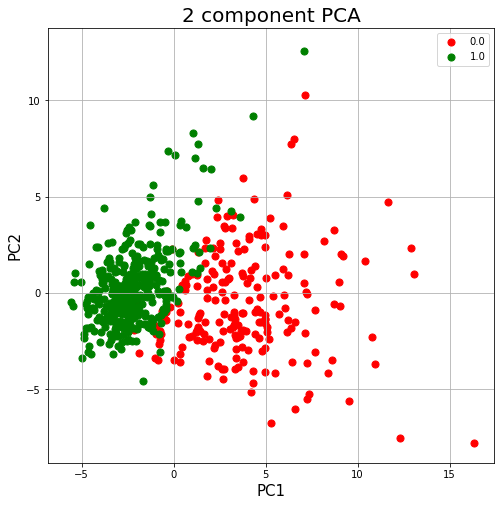

In [51]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0, 1.0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cancer'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(finalDf.iloc[:,:-1], finalDf.iloc[:,-1:], test_size = 0.2, random_state=0)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

C:\Users\Zigorat\Anaconda3\envs\env_cxr\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


acc for training data: 0.965
acc for test data: 0.930


In [ ]:
# Q4

In [72]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules,fpgrowth

basket_df = pd.read_csv('Basket.csv', sep='\n', names=['items'], header=None)

In [73]:
def clean_comma(x):
    return x[:-1].split(',')

basket_df['items'] = basket_df['items'].apply(clean_comma)

In [74]:
label_encoder = MultiLabelBinarizer()

basket_df = pd.DataFrame(label_encoder.fit_transform(basket_df['items']),columns=label_encoder.classes_)
basket_df

,Bread,Butter,Cheese,Coffee Powder,Ghee,Lassi,Milk,Panner,Sugar,Sweet,Tea Powder,Yougurt
0,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0,0,1,1,0,0,0,0,0,0,0
2,0,1,1,0,0,1,0,0,0,0,1,0
3,1,1,1,1,0,0,0,1,0,0,1,0
4,0,1,1,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12521,1,0,1,0,0,0,1,1,1,0,0,0
12522,1,0,1,1,0,0,0,0,1,0,0,0
12523,1,0,1,0,0,0,1,0,0,0,0,1
12524,1,0,1,0,1,0,0,0,1,0,0,1


In [75]:
frequent_itemsets_ap = apriori(basket_df, min_support=0.1, use_colnames=True)
frequent_itemsets_ap

,support,itemsets
0,0.437809,(Bread)
1,0.437570,(Butter)
2,0.437171,(Cheese)
3,0.439805,(Coffee Powder)
4,0.439885,(Ghee)
...,...,...
74,0.201900,"(Yougurt, Sugar)"
75,0.199824,"(Sweet, Tea Powder)"
76,0.197829,"(Yougurt, Sweet)"
77,0.198467,"(Yougurt, Tea Powder)"


In [76]:
frequent_itemsets_fp = fpgrowth(basket_df, min_support=0.1,  use_colnames=True)
frequent_itemsets_fp

,support,itemsets
0,0.439885,(Ghee)
1,0.439805,(Coffee Powder)
2,0.439326,(Yougurt)
3,0.437570,(Butter)
4,0.437171,(Cheese)
...,...,...
74,0.199824,"(Coffee Powder, Sugar)"
75,0.199186,"(Sweet, Sugar)"
76,0.204614,"(Sugar, Milk)"
77,0.200862,"(Sugar, Ghee)"


In [79]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Butter),(Bread),0.437570,0.437809,0.19695,0.450100,1.028074,0.005378,1.022351
1,(Bread),(Butter),0.437809,0.437570,0.19695,0.449854,1.028074,0.005378,1.022329
2,(Cheese),(Bread),0.437171,0.437809,0.20198,0.462016,1.055291,0.010582,1.044995
3,(Bread),(Cheese),0.437809,0.437171,0.20198,0.461342,1.055291,0.010582,1.044873
4,(Coffee Powder),(Bread),0.439805,0.437809,0.20182,0.458885,1.048140,0.009269,1.038949
...,...,...,...,...,...,...,...,...,...
133,"(Lassi, Panner)",(Sweet),0.199345,0.437730,0.10099,0.506608,1.157354,0.013731,1.139602
134,"(Sweet, Panner)",(Lassi),0.199984,0.433658,0.10099,0.504990,1.164489,0.014265,1.144102
135,(Lassi),"(Sweet, Panner)",0.433658,0.199984,0.10099,0.232879,1.164489,0.014265,1.042881
136,(Sweet),"(Lassi, Panner)",0.437730,0.199345,0.10099,0.230713,1.157354,0.013731,1.040775
